<a href="https://colab.research.google.com/github/thomassems/MyWorkoutApp/blob/main/fight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
train_data = pd.read_csv("ufc.csv")
train_data.head(5)

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7417 non-null   object 
 1   Fighter 1      7417 non-null   object 
 2   Fighter 2      7413 non-null   object 
 3   Fighter_1_KD   7413 non-null   float64
 4   Fighter_2_KD   7413 non-null   float64
 5   Fighter_1_STR  7413 non-null   float64
 6   Fighter_2_STR  7413 non-null   float64
 7   Fighter_1_TD   7413 non-null   float64
 8   Fighter_2_TD   7413 non-null   float64
 9   Fighter_1_SUB  7413 non-null   float64
 10  Fighter_2_SUB  7413 non-null   float64
 11  Weight_Class   7413 non-null   object 
 12  Method         7413 non-null   object 
 13  Round          7413 non-null   float64
 14  Time           7413 non-null   object 
 15  Event Name     7413 non-null   object 
 16  Date           7412 non-null   object 
 17  Winner         7414 non-null   object 
dtypes: float

In [4]:
type(train_data)
# drop unneccessary categories
train_data.drop('Location', axis=1, inplace=True)
# to drop multiple categories do something like ['Location', 'Date']
train_data.head()

,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva


In [5]:
train_data.isnull().sum()

Fighter 1        0
Fighter 2        4
Fighter_1_KD     4
Fighter_2_KD     4
Fighter_1_STR    4
Fighter_2_STR    4
Fighter_1_TD     4
Fighter_2_TD     4
Fighter_1_SUB    4
Fighter_2_SUB    4
Weight_Class     4
Method           4
Round            4
Time             4
Event Name       4
Date             5
Winner           3
dtype: int64

In [6]:
print(train_data.columns)

Index(['Fighter 1', 'Fighter 2', 'Fighter_1_KD', 'Fighter_2_KD',
       'Fighter_1_STR', 'Fighter_2_STR', 'Fighter_1_TD', 'Fighter_2_TD',
       'Fighter_1_SUB', 'Fighter_2_SUB', 'Weight_Class', 'Method', 'Round',
       'Time', 'Event Name', 'Date', 'Winner'],
      dtype='object')


# **UFC Victory Methods Analysis**

Plotting the top methods of victory

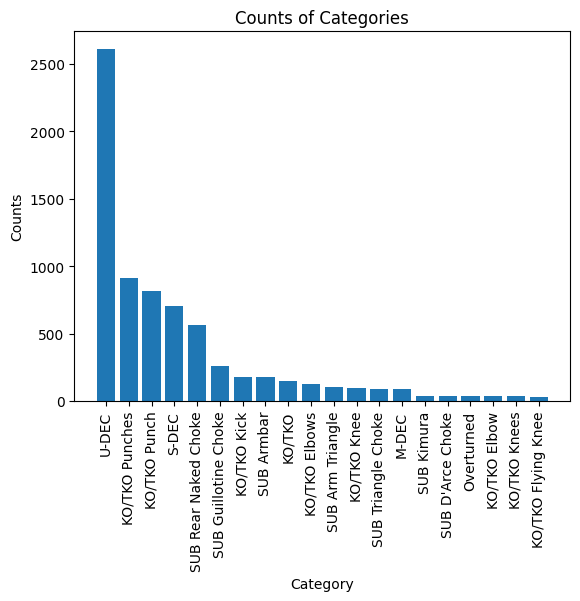

In [7]:
category_counts = train_data['Method'].value_counts()
top_10_categories = category_counts.head(20)
categories = top_10_categories.index
counts = top_10_categories.values

plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Counts of Categories')
plt.xticks(rotation=90)
plt.show()

Subdividing the Method of Victory into 3 Main Categories

In [8]:
for i in train_data.index:
    method_str = str(train_data.at[i, 'Method'])
    if 'DEC' in method_str:
        train_data.at[i, 'VictoryMethod'] = 'Decision'
    elif 'KO/TKO' in method_str:
        train_data.at[i, 'VictoryMethod'] = 'KO/TKO'
    elif 'SUB' in method_str:
        train_data.at[i, 'VictoryMethod'] = 'SUB'
    else:
      train_data.at[i, 'VictoryMethod'] = 'Other'

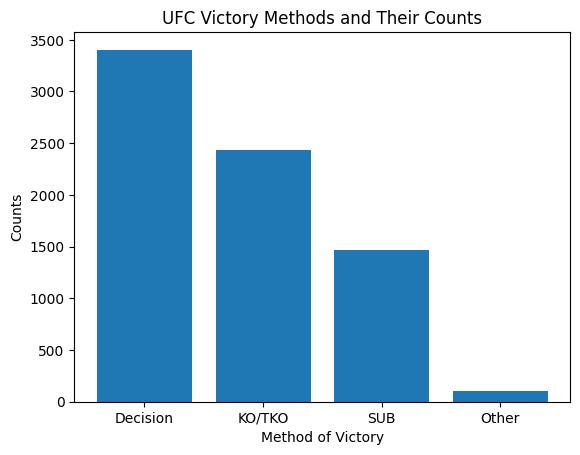

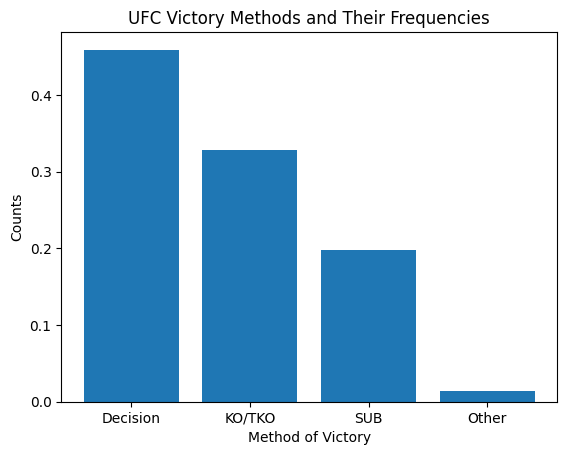

In [9]:
# Plotting counts
category_counts = train_data['VictoryMethod'].value_counts()
categories = category_counts.index
counts = category_counts.values

plt.bar(categories, counts)
plt.xlabel('Method of Victory')
plt.ylabel('Counts')
plt.title('UFC Victory Methods and Their Counts')

plt.show()

# Plotting frequencies
category_counts = train_data['VictoryMethod'].value_counts(normalize=True)
categories = category_counts.index
counts = category_counts.values
plt.bar(categories, counts)
plt.xlabel('Method of Victory')
plt.ylabel('Counts')
plt.title('UFC Victory Methods and Their Frequencies')

plt.show()

Based on the above charts, we can see that the most commmon method of victory within UFC fights is victory by decision, followed by KO/TKO (knock-out/technical knock-out), followed by SUB (submission), and then other.

In [10]:
import re
dropped = []
for i in train_data.index:
    date_str = str(train_data.at[i, 'Date'])
    matchy = re.search(r'\d-[a-zA-z]+-(\d{2})', date_str)
    if matchy:
      year = int(matchy.group(1))
      # then we can convert this to the 2000's since our data's from 1994-2023
      if year >= 0 and year <= 23:
        year += 2000
      else:
        year += 1900
      train_data.at[i, 'Year'] = year
    else: # no year value so we drop it later so we don't impact indexing
      dropped.append(i)
# drop all rows without a year value
train_data = train_data.drop(dropped)

Graphing the frequncy of different methods of victory throughout the years

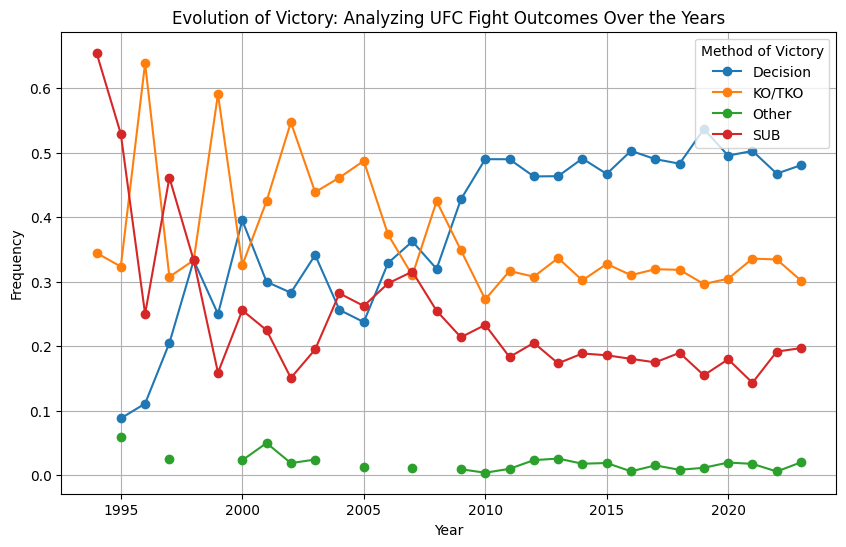

In [11]:
frequencies = train_data.groupby(['Year', 'VictoryMethod']).size().reset_index(name='Frequency')
frequencies['YearTotal'] = frequencies.groupby('Year')['Frequency'].transform('sum')
frequencies['Proportion'] = frequencies['Frequency'] / frequencies['YearTotal']
pivot_df = frequencies.pivot(index='Year', columns='VictoryMethod', values='Proportion')
pivot_df.plot(kind='line', figsize=(10, 6), marker="o")
plt.title('Evolution of Victory: Analyzing UFC Fight Outcomes Over the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(title='Method of Victory', loc="upper right")
plt.show()

This plot shows that when the UFC first launched, the method of victory was very unpredictable, probably due to the lack of fights and a smaller sample size. But we see as time passes, the data stabilizes with decision being the most common method of victory, followed by KO/TKO, then submission, and then other forms.

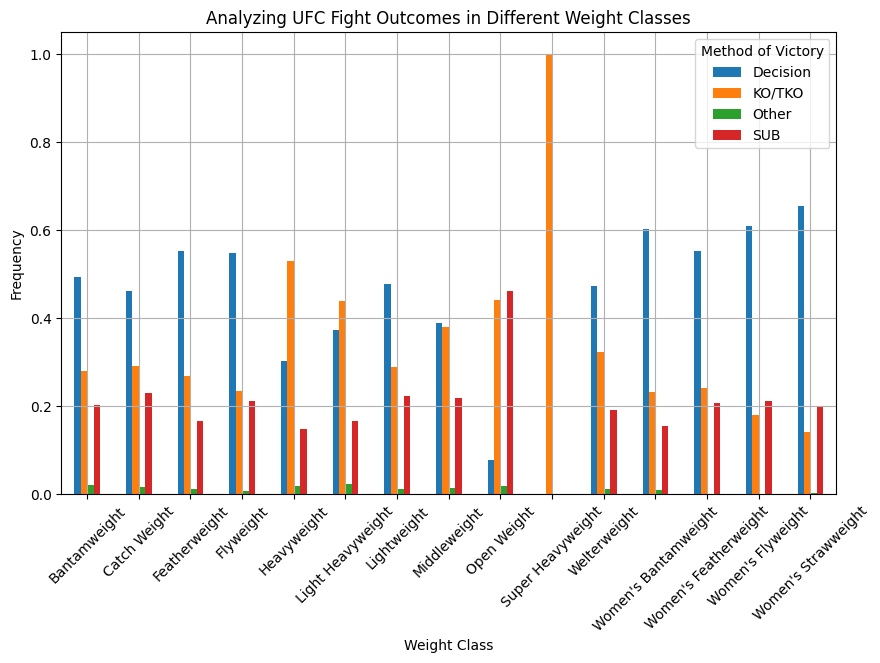

In [12]:
frequencies = train_data.groupby(['Weight_Class', 'VictoryMethod']).size().reset_index(name='Frequency')
frequencies['WeightClassTotal'] = frequencies.groupby('Weight_Class')['Frequency'].transform('sum')
frequencies['Proportion'] = frequencies['Frequency'] / frequencies['WeightClassTotal']
pivot_df = frequencies.pivot(index='Weight_Class', columns='VictoryMethod', values='Proportion')
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Analyzing UFC Fight Outcomes in Different Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Method of Victory', loc="upper right")
plt.show()

This data shows that in the majority of weight classes, the trend is that most fights end in a decision, followed by KO/TKO, and then submission. However, we see that in the heavyweight weight classes, the majorty of fights end in KO/TKO. This can potentially be explained by the fact that heavy weight fighters are a lot larger then the other fighters, so they're punches are lot more powerful, resulting in higher knockout potential.

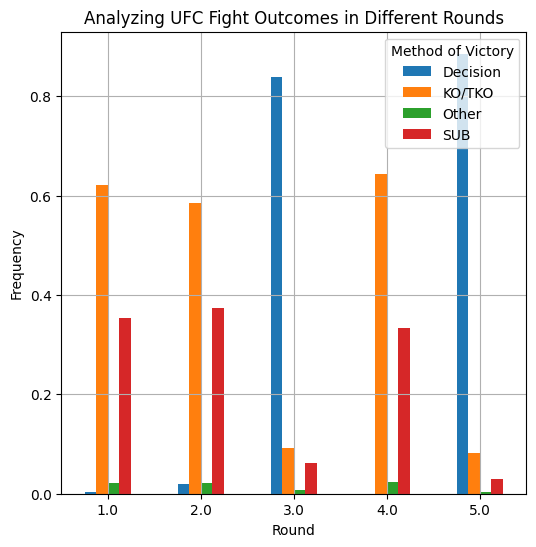

In [13]:
frequencies = train_data.groupby(['Round', 'VictoryMethod']).size().reset_index(name='Frequency')
frequencies['RoundTotal'] = frequencies.groupby('Round')['Frequency'].transform('sum')
frequencies['Proportion'] = frequencies['Frequency'] / frequencies['RoundTotal']
pivot_df = frequencies.pivot(index='Round', columns='VictoryMethod', values='Proportion')
pivot_df.plot(kind='bar', figsize=(6, 6))
plt.title('Analyzing UFC Fight Outcomes in Different Rounds')
plt.xlabel('Round')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Method of Victory', loc="upper right")
plt.show()

In this plot we can see that decision is the most common method of victory in rounds 3 and 5. It makes sense that victory by decision is low in the other rounds since most traditional fights are either 3 rounds or 5 rounds in length. We also can see that if a fight makes it to either round 3 or round 5, it very likely that the fight will end in a decision.

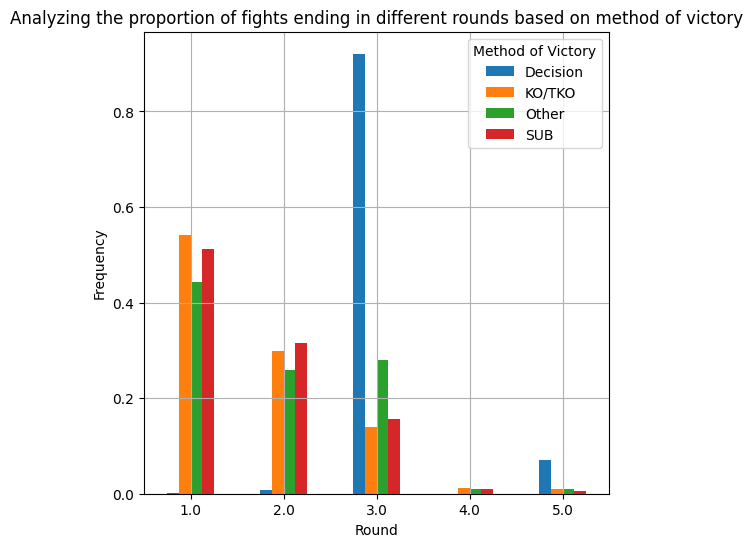

In [14]:
frequencies = train_data.groupby(['Round', 'VictoryMethod']).size().reset_index(name='Frequency')
frequencies['Total'] = frequencies.groupby('VictoryMethod')['Frequency'].transform('sum')
frequencies['Proportion'] = frequencies['Frequency'] / frequencies['Total']
frequencies
pivot_df = frequencies.pivot(index='Round', columns='VictoryMethod', values='Proportion')
pivot_df.plot(kind='bar', figsize=(6, 6))
plt.title('Analyzing the proportion of fights ending in different rounds based on method of victory')
plt.xlabel('Round')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Method of Victory', loc="upper right")
plt.show()

This plot shows the odds of a fight ending in a certain round given that we know the method of victory. For example; if we were to know that a fight ended via KO/TKO, based on the data, we can see that there is around a 55% chance that the fight ended in the first round, around a 30% chance the fight ended in the 2nd round, and so on.

One thing we should do is split up the 3 round and 5 round bouts, because if we knew a 5 round fight ended in KO/TKO, it is not clear what round this fight was most likely to end in (this is not possible based on the given data)

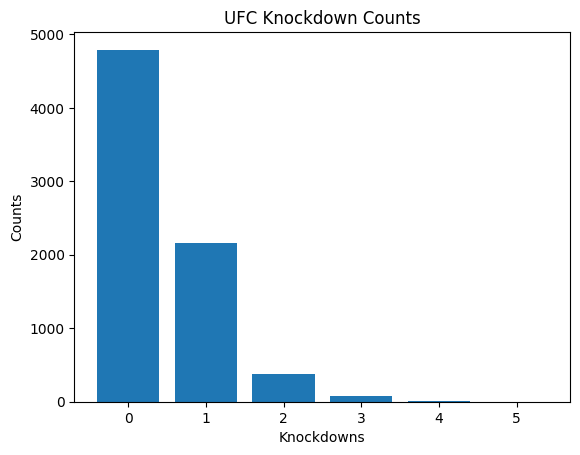

In [15]:
for i in train_data.index:
    method_str = str(train_data.at[i, 'Fighter_1_KD'])
    method_strs = str(train_data.at[i, 'Fighter_2_KD'])
    train_data.at[i, 'Total_KD'] = float(method_str) + float(method_strs)


category_counts = (train_data['Total_KD'].value_counts())
categories = category_counts.index
counts = category_counts.values

plt.bar(categories, counts)
plt.xlabel('Knockdowns')
plt.ylabel('Counts')
plt.title('UFC Knockdown Counts')

plt.show()

Analysis of the average number of strikes needed to win by KO/TKO

In [24]:
def compute_avgs(cat1, cat2, newcat, method, name):
  for i in train_data.index:
      method_str = str(train_data.at[i, cat1])
      method_strs = str(train_data.at[i, cat2])
      train_data.at[i, newcat] = float(method_str) + float(method_strs)

  avg = train_data[newcat].mean()

  sum, count = 0, 0
  for i in train_data.index:
    if train_data.at[i, 'VictoryMethod'] == method:
      sum += train_data.at[i, newcat]
      count += 1
  print(f"The avg number of total {name} in a fight is {avg}")
  print(f"The avg number of total {name} in a fight that ends in \
  {method} is {sum/count}.")


compute_avgs('Fighter_1_STR', 'Fighter_2_STR', 'Total_STR', 'KO/TKO', 'strikes')
compute_avgs('Fighter_1_TD', 'Fighter_2_TD', 'Total_TD', 'SUB', 'takedowns')
compute_avgs('Fighter_1_TD', 'Fighter_2_TD', 'Total_TD', 'KO/TKO', 'takedowns')
compute_avgs('Fighter_1_SUB', 'Fighter_2_SUB',
             'Total_SUB', 'SUB', 'submission attempts')

The avg number of total strikes in a fight is 71.68497031840259
The avg number of total strikes in a fight that ends in   KO/TKO is 48.73809523809524.
The avg number of total takedowns in a fight is 2.1184565569347007
The avg number of total takedowns in a fight that ends in   SUB is 1.8174386920980927.
The avg number of total takedowns in a fight is 2.1184565569347007
The avg number of total takedowns in a fight that ends in   KO/TKO is 1.0270935960591132.
The avg number of total submission attempts in a fight is 0.7826497571505666
The avg number of total submission attempts in a fight that ends in   SUB is 1.662125340599455.


In [25]:
for i in train_data.index:
  if train_data.at[i, 'VictoryMethod'] == 'KO/TKO':
    if train_data.at[i, 'Fighter 1'] == train_data.at[i, 'Winner']:
      train_data.at[i, 'Strikes_to_Win'] = train_data.at[i, 'Fighter_1_STR']
    else:
      train_data.at[i, 'Strikes_to_Win'] = train_data.at[i, 'Fighter_2_STR']
train_data['Strikes_to_Win'].mean()

31.73727422003284

In [26]:
train_data.head()

,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,...,Event Name,Date,Winner,VictoryMethod,Year,Total_KD,Total_STR,Total_TD,Total_SUB,Strikes_to_Win
0,Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,...,UFC Fight Night,2-Dec-23,Arman Tsarukyan,KO/TKO,2023.0,1.0,10.0,0.0,0.0,8.0
1,Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,...,UFC Fight Night,2-Dec-23,Jalin Turner,KO/TKO,2023.0,1.0,48.0,0.0,0.0,33.0
2,Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,...,UFC Fight Night,2-Dec-23,Deiveson Figueiredo,Decision,2023.0,0.0,91.0,4.0,0.0,NaN
3,Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,...,UFC Fight Night,2-Dec-23,Sean Brady,SUB,2023.0,0.0,32.0,5.0,3.0,NaN
4,Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,...,UFC Fight Night,2-Dec-23,Joaquim Silva,Decision,2023.0,0.0,89.0,4.0,2.0,NaN


Analysis of the number of submission attempts it takes on average for a fighter to win by submission